<a href="https://colab.research.google.com/github/LivingstonTardzenyuy/Deep-Learning-with-TensorFlow/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensorflow Neural Networks

We will be predicting numerical variables based on some other variables

In [2]:
import tensorflow as tf
print(tf.__version__)

2.17.1


## creating some data to view and fit


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


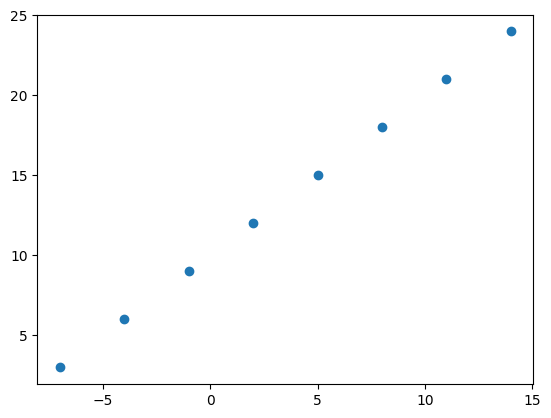

In [4]:
# Create features

X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

#Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

#visualize
plt.scatter(X,y)

### Input and output shapes

In [5]:
# Create a demo tensor for housing predicting problem
house_info = tf.constant(['bedroom','bathroom','garage'])
house_price = tf.constant([939700])

house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [6]:
input_shape = X.shape
output_shape = y.shape

input_shape, output_shape

((8,), (8,))

In [7]:
X[0], y[0]

(-7.0, 3.0)

In [8]:
# Turn our Numpy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X = tf.expand_dims(X, axis=-1)
X, y

(<tf.Tensor: shape=(8, 1), dtype=float64, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [9]:
input_shape = X[0], X.shape
output_shape = y[0], y.shape

input_shape, output_shape

((<tf.Tensor: shape=(1,), dtype=float64, numpy=array([-7.])>,
  TensorShape([8, 1])),
 (<tf.Tensor: shape=(), dtype=float64, numpy=3.0>, TensorShape([8])))

## Steps in modelling with TensorFlow

1. Creating a model - define the input and output layers, as well as the hidden layers of of a deep learning model.
2. Compiling a model - define the loss function (the function that tells our function how wrong it is)
3. Evalution Matrix - What we can use to interpret the performance of our model.
4. Fitting our model - Letting model find patterns between X and y (features and labels)


In [10]:
# set the random seed.
tf.random.set_seed(42)

# 1. Create a model usig the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(
      loss = tf.keras.losses.mae, # mae is short for mean absolute error.
      optimizer = tf.keras.optimizers.SGD(),  # Stochastic gradient descent(SGD) helps to optimize our ML model
      metrics = ['mae'],
              )

# 3. Fit the model
model.fit(X, y, epochs=5)  # epochs defines how many times to go through the data

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 14.2441 - mae: 14.2441
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - loss: 14.1116 - mae: 14.1116
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - loss: 13.9791 - mae: 13.9791
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step - loss: 13.8466 - mae: 13.8466
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 13.7141 - mae: 13.7141


In [11]:
 # check out X and y
 X, y

(<tf.Tensor: shape=(8, 1), dtype=float64, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [12]:
# Making prediction using our model.
y_pred = model.predict(np.array([17.0]))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


array([[-0.5890927]], dtype=float32)

In [13]:
y_pred + 13

array([[12.410908]], dtype=float32)

## How to improve our model

We will improve our model using

1. **Creating a model** Add more layers,
increase each of the hidden layers.

2. **Compiling a model** - here we might change the optimization function or learning rate of the optimization function
3. **Fitting a model** - we might fit a model for more epochs(more training time)

In [14]:
# Let's rebuild our model
tf.random.set_seed(42)

#1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile our model
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.01),
    metrics = ['mae']
)

#3. Fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 17.2509 - mae: 17.2509
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 16.9696 - mae: 16.9696
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 16.6884 - mae: 16.6884
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 16.4071 - mae: 16.4071
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step - loss: 16.1259 - mae: 16.1259
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 15.8446 - mae: 15.8446
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step - loss: 15.5634 - mae: 15.5634
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - loss: 15.2821 - mae: 15.2821
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step - loss: 15.0009 - mae: 15.0009
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - loss: 14.7793 - mae: 14.7793
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - loss: 14.6468 - mae: 14.6468
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - loss: 14.5143 - mae: 14.5143
Epoch 13/100
1/1 ━

In [15]:
# our data
X, y

(<tf.Tensor: shape=(8, 1), dtype=float64, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [16]:
model.predict(np.array([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


array([[29.460733]], dtype=float32)

# Wowow our models looks really better now.

Let's try to change another paramter this time optimizer to see the effect

In [17]:

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics = ['mae']
)

model.fit(X, y, epochs=100)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 643ms/step - loss: 18.4581 - mae: 18.4581
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 18.3981 - mae: 18.3981
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 18.3381 - mae: 18.3381
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 18.2781 - mae: 18.2781
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 18.2181 - mae: 18.2181
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 18.1581 - mae: 18.1581
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 18.0981 - mae: 18.0981
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 18.0381 - mae: 18.0381
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 17.9781 - mae: 17.9781
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 17.9181 - mae: 17.9181
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 17.8581 - mae: 17.8581
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 17.7981 - mae: 17.7981
Epoch 13/100
1/1 ━━━━━━━

In [18]:
model.predict(np.array([17]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


array([[-1.1687175]], dtype=float32)

# Improving our model

We will increase the dense layers

In [19]:
# 1. Create the model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation=None),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics = ['mae']
)

#3. Fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 903ms/step - loss: 14.7281 - mae: 14.7281
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 13.7260 - mae: 13.7260
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 12.7337 - mae: 12.7337
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 11.7454 - mae: 11.7454
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 10.7558 - mae: 10.7558
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 9.7583 - mae: 9.7583
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 8.7463 - mae: 8.7463
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 7.7138 - mae: 7.7138
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 6.6711 - mae: 6.6711
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 6.7758 - mae: 6.7758
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 7.1465 - mae: 7.1465
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - loss: 7.5139 - mae: 7.5139
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━

In [20]:
model.predict(np.array([17]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


array([[27.620874]], dtype=float32)

In [21]:
X, y

(<tf.Tensor: shape=(8, 1), dtype=float64, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

## Evaluating a model

When it comes to evalution.. there are 3 words to remainber.

> "Visualize, visualize, visualize"

It's a good idea to visualize
* The data
* The model
* Training of a model
* The predictions of the model

In [22]:
# Make a bigger dataset

X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [23]:
# Make labels for dataset

y = X + 10

y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

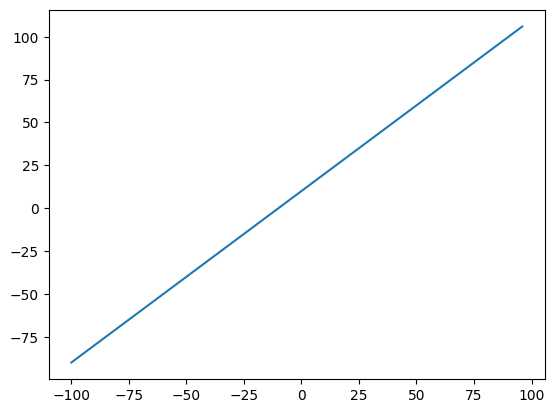

In [24]:
# Visualize the data
import matplotlib.pyplot as plt

plt.plot(X, y)

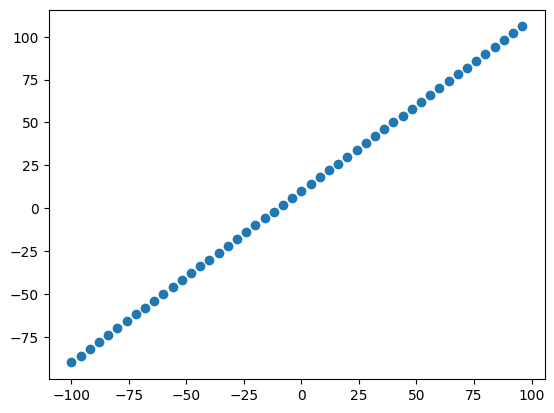

In [25]:
plt.scatter(X, y)

In [26]:
# check the length of our data.

len(X)

50

In [27]:
# Splitting our data into training and test set.

X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

len(X_train), len(X_test)


(40, 10)

# Visualizing our data.

Now we've got our data in trianing and test sets... Let's visualize it now.

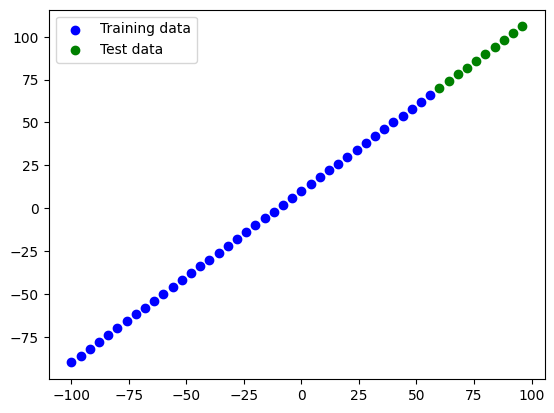

In [28]:
# plot training data
plt.scatter(X_train, y_train, c='b', label='Training data')

# plot test data
plt.scatter(X_test, y_test, c='g', label='Test data')

plt.legend();

In [29]:
# Let's have a look at how to build a neural network for our data.

tf.random.set_seed(42)

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape = [1]),
    # tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['mae']
)


# 3. Fit the model
model.fit(X_train, y_train, epochs = 100, verbose=0)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
# Making predictions
model.predict(np.array([17]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


array([[17.249592]], dtype=float32)

In [31]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

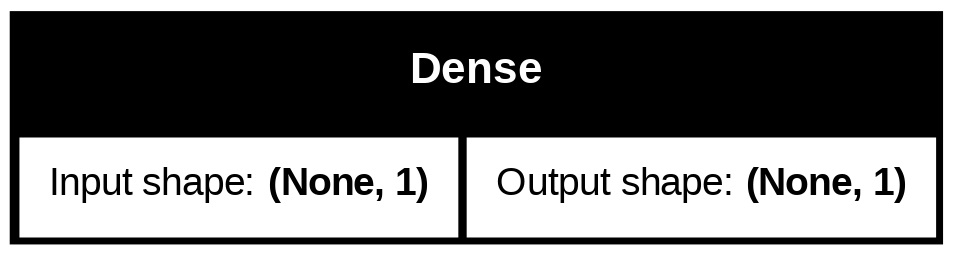

In [32]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

# Visualizing our model predictions

To visualize predicitons, it's a good idea to plot them againts the ground truth labels.



### Evaluating our model's prediction with regression evaluation metrics

In [33]:
model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - loss: 13.9524 - mae: 13.9524


[13.952357292175293, 13.952357292175293]

# Calculate the mean absolute error.


In [34]:
tf.keras.losses.MAE(y_test, model.predict(X_test))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([12.7124405, 12.987976 , 13.263512 , 13.539047 , 13.81459  ,
       14.090126 , 14.365662 , 14.641205 , 14.91674  , 15.192276 ],
      dtype=float32)>

In [35]:
# Make some predictions.
y_pred = model.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


array([[57.28756 ],
       [61.012024],
       [64.73649 ],
       [68.46095 ],
       [72.18541 ],
       [75.909874],
       [79.63434 ],
       [83.358795],
       [87.08326 ],
       [90.807724]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [38]:
# Calculate the mean absolute error
mae = tf.keras.losses.MAE(y_test, y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([12.7124405, 12.987976 , 13.263512 , 13.539047 , 13.81459  ,
       14.090126 , 14.365662 , 14.641205 , 14.91674  , 15.192276 ],
      dtype=float32)>

In [39]:
y_pred - y_test

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[-13, -17, -21, -25, -29, -33, -37, -41, -45, -49],
       [ -9, -13, -17, -21, -25, -29, -33, -37, -41, -45],
       [ -6, -10, -14, -18, -22, -26, -30, -34, -38, -42],
       [ -2,  -6, -10, -14, -18, -22, -26, -30, -34, -38],
       [  2,  -2,  -6, -10, -14, -18, -22, -26, -30, -34],
       [  5,   1,  -3,  -7, -11, -15, -19, -23, -27, -31],
       [  9,   5,   1,  -3,  -7, -11, -15, -19, -23, -27],
       [ 13,   9,   5,   1,  -3,  -7, -11, -15, -19, -23],
       [ 17,  13,   9,   5,   1,  -3,  -7, -11, -15, -19],
       [ 20,  16,  12,   8,   4,   0,  -4,  -8, -12, -16]], dtype=int32)>

In [40]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([57.28756 , 61.012024, 64.73649 , 68.46095 , 72.18541 , 75.909874,
       79.63434 , 83.358795, 87.08326 , 90.807724], dtype=float32)>

In [41]:
# Calculate the mean absolute error

mae = tf.keras.losses.MAE(y_test, tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=13.952357>

In [42]:
# Calculate the mean square error

mse = tf.keras.losses.MSE(y_test, tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=195.29463>

In [43]:
# Make some functions to reuse MAE and MSE

def mae(y_true, y_pred):
  return tf.keras.losses.MAE(y_test, tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.keras.losses.MSE(y_test, tf.squeeze(y_pred))


### Running experiments to improve our model
  Build model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it ......


  1. Get more data - get more expamples.
  2. Make our model larger(adding more layers or hidden layers)
  3. Train for longer - give our model more time to find patterns.

  Let's do 3 modelling experiments.

  1. 'model_1' - same as original model, 1 layer, trained for 100 epochs.
  2. 'model_2' - 2 layers, trained for 100 epochs
  3. 'model_3' - 2 layers, trained for 500 epochs

# Build model 1

In [49]:
tf.experimental.numpy.experimental_enable_numpy_behavior()
X_train = X_train.reshape(-1, 1)

X_train, y_train


(<tf.Tensor: shape=(40, 1), dtype=int32, numpy=
 array([[-100],
        [ -96],
        [ -92],
        [ -88],
        [ -84],
        [ -80],
        [ -76],
        [ -72],
        [ -68],
        [ -64],
        [ -60],
        [ -56],
        [ -52],
        [ -48],
        [ -44],
        [ -40],
        [ -36],
        [ -32],
        [ -28],
        [ -24],
        [ -20],
        [ -16],
        [ -12],
        [  -8],
        [  -4],
        [   0],
        [   4],
        [   8],
        [  12],
        [  16],
        [  20],
        [  24],
        [  28],
        [  32],
        [  36],
        [  40],
        [  44],
        [  48],
        [  52],
        [  56]], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [50]:
# Set random seed
tf.random.set_seed(42)

# 1. create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['mae']
)

# 3. fit the model
model_1.fit(X_train, y_train, epochs = 100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 9.8233 - mae: 9.8233 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11.4632 - mae: 11.4632 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.4643 - mae: 8.4643 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.9331 - mae: 9.9331   
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11.6088 - mae: 11.6088 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.5741 - mae: 8.5741 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 10.0428 - mae: 10.0428 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11.7543 - mae: 11.7543 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.6838 - mae: 8.6838 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 10.1526 - mae: 10.1526 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 11.9024 - mae: 11.9024 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 12.7213 - mae: 12.7213 
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━

In [52]:
def plot_predictions(predictions=None):
  """
  Plots the predicted values against the true values.

  Args:
    predictions: The predicted values.
  """
  # Reshape X_test to a 1D array for plotting
  X_test_1d = X_test.reshape(-1)

  plt.figure(figsize=(10, 7))
  plt.scatter(X_test_1d, y_test, c='b', s=4, label="Testing data")
  if predictions is not None:
    plt.scatter(X_test_1d, predictions, c='r', s=4, label="Predictions")
  plt.legend(prop={"size": 14})
  plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


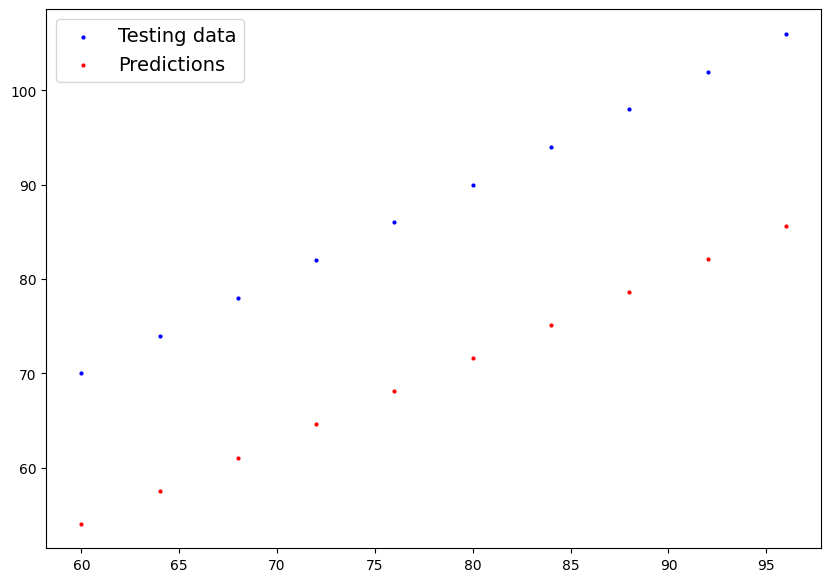

In [53]:
# Make and plot predictions

y_preds_1 = model_1.predict(X_test)

plot_predictions(predictions=y_preds_1)

In [54]:
 # calculate model_1 evalution metrics.

 mae_1 = mae(y_test, tf.squeeze(y_preds_1))
 mse_1 = mse(y_test, tf.squeeze(y_preds_1))

 mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.15123>,
 <tf.Tensor: shape=(), dtype=float32, numpy=331.45682>)

# 'model_2'

- 2 layers, trained for 100 epochs

In [57]:
# set the random seed.
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

# compile the model
model_2.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['mae']
)

# fit the model
model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 45.4016 - mae: 45.4016 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 16.6587 - mae: 16.6587 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 17.1333 - mae: 17.1333 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 13.5238 - mae: 13.5238 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.4497 - mae: 6.4497 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 11.2091 - mae: 11.2091
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 13.1746 - mae: 13.1746 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 15.7219 - mae: 15.7219 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.2248 - mae: 5.2248 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 14.3754 - mae: 14.3754 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 14.9320 - mae: 14.9320
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.1069 - mae: 6.1069 
Epoch 13/100
2/2 ━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


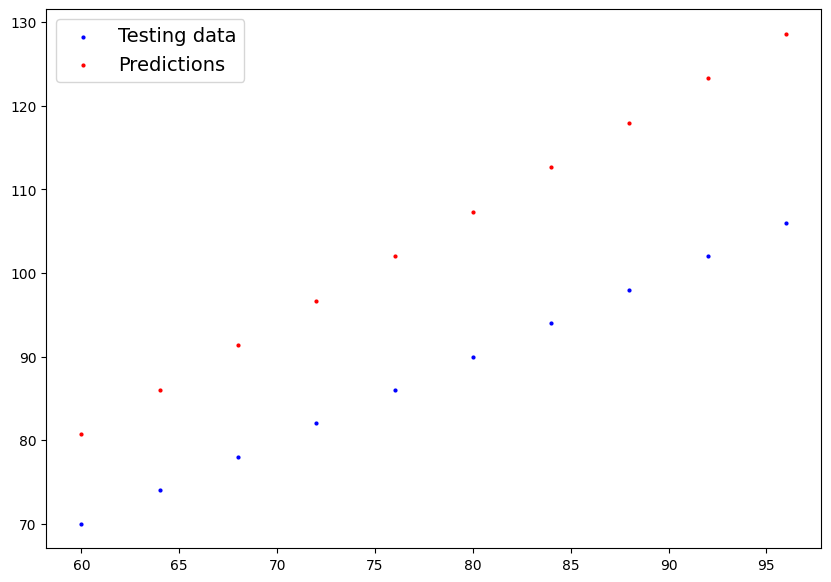

In [58]:
# Make and plot predictions of model_2

y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [59]:
# calculate model_2 evaluation metrics.

mae_2 = mae(y_test, tf.squeeze(y_preds_2))
mse_2 = mse(y_test, tf.squeeze(y_preds_2))

mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=16.682901>,
 <tf.Tensor: shape=(), dtype=float32, numpy=292.68564>)